<a href="https://colab.research.google.com/github/layal-z/AAI614_Zeineddine/blob/main/Week_4/Graded_Assessment_Data_science1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA** **EXPLORATION**:


1.  Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?
2.	How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.
3.	Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).
4.	The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data. Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.  Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.
5.	Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.
6.	Issues for discussion in your report and analyses could be around a) who works more hours, men or women? b) If you use education_num as a control variable, does the trend in hours worked by men vs women remain the same? Is education_num significant? If you add gross_income_group as a binary variable in the model and compare the model with these 3 variables vs the models with 2 and 1 variable. What statistic would you choose to decide which model is the best?




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Adding Column names since the raw file showed no column names)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df = pd.read_csv(url, names=columns, skipinitialspace=True)

# Check types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2]:
df.tail()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
# missing values, since all column return 32561 as non-null, which is strange for such a dataset
# lets start with text fields to see if there are some content that signals missing values sauch as na...
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df[col].unique()) # distinct values
    print("-" * 30)


Column: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
------------------------------
Column: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
------------------------------
Column: marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
------------------------------
Column: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
------------------------------
Column: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
------------------------------
Column: race
['White' '

In [4]:
# replacing the "?" in workclass, occupation and native country + inplace
df.replace('?', np.nan, inplace=True)
# printing missing values
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [5]:
# checking the distribution of numerical columns
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Missing values have been updated in non-numerical columns, and no missing values were found in numerical column**

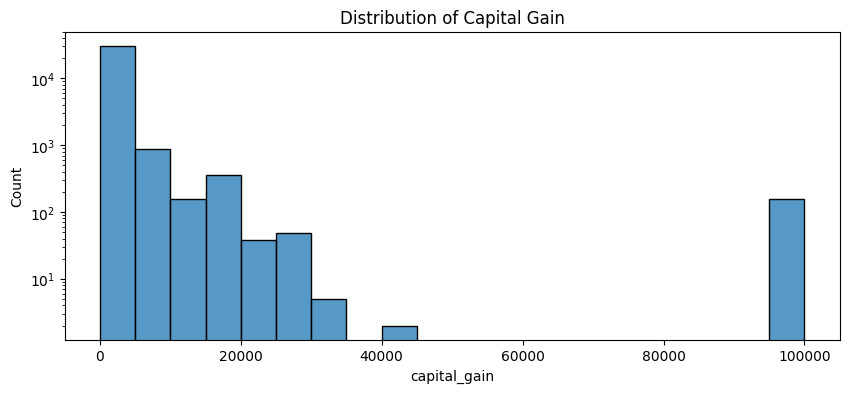

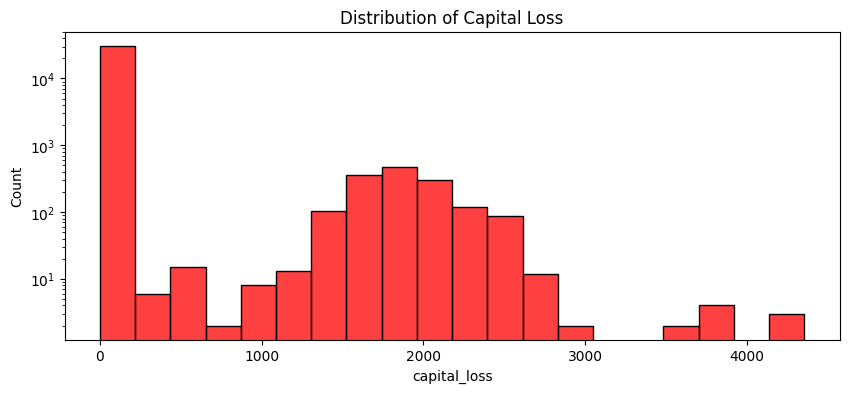

In [6]:
# Plotting the distribution for capital gain and capital loss
# Plot Capital Gain
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='capital_gain', bins=20)
plt.title('Distribution of Capital Gain')
plt.yscale('log')
plt.show()

# Plot Capital Loss
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='capital_loss', bins=20, color='red')
plt.title('Distribution of Capital Loss')
plt.yscale('log')
plt.show()

**the Distribution is not totally skewed in both gain and loss values, therefore a transformation is ideal but in several categories not only yes/no or gained/0 or loss/0**

In [7]:
#transforming the numerc
df['gain_level'] = 'None'

# Find the median of people who actually have a gain
non_zero_median = df.loc[df['capital_gain'] > 0, 'capital_gain'].median()

# Apply logic:
# 0 -> None
# 0 to Median -> Low
# Median to Max -> High
df.loc[(df['capital_gain'] > 0) & (df['capital_gain'] <= non_zero_median), 'gain_level'] = 'Low'
df.loc[df['capital_gain'] > non_zero_median, 'gain_level'] = 'High'

print("\nAutomatic Levels (None/Low/High):")
print(df['gain_level'].value_counts())


df['loss_level'] = 'None'

# Find the median of people who actually have a gain
non_zero_loss_median = df.loc[df['capital_loss'] > 0, 'capital_loss'].median()

# Apply logic:
# 0 -> None
# 0 to Median -> Low
# Median to Max -> High
df.loc[(df['capital_loss'] > 0) & (df['capital_loss'] <= non_zero_loss_median), 'loss_level'] = 'Low'
df.loc[df['capital_loss'] > non_zero_loss_median, 'loss_level'] = 'High'

print("\nAutomatic Levels (None/Low/High):")
print(df['loss_level'].value_counts())


Automatic Levels (None/Low/High):
gain_level
None    29849
Low      1559
High     1153
Name: count, dtype: int64

Automatic Levels (None/Low/High):
loss_level
None    31042
Low       782
High      737
Name: count, dtype: int64


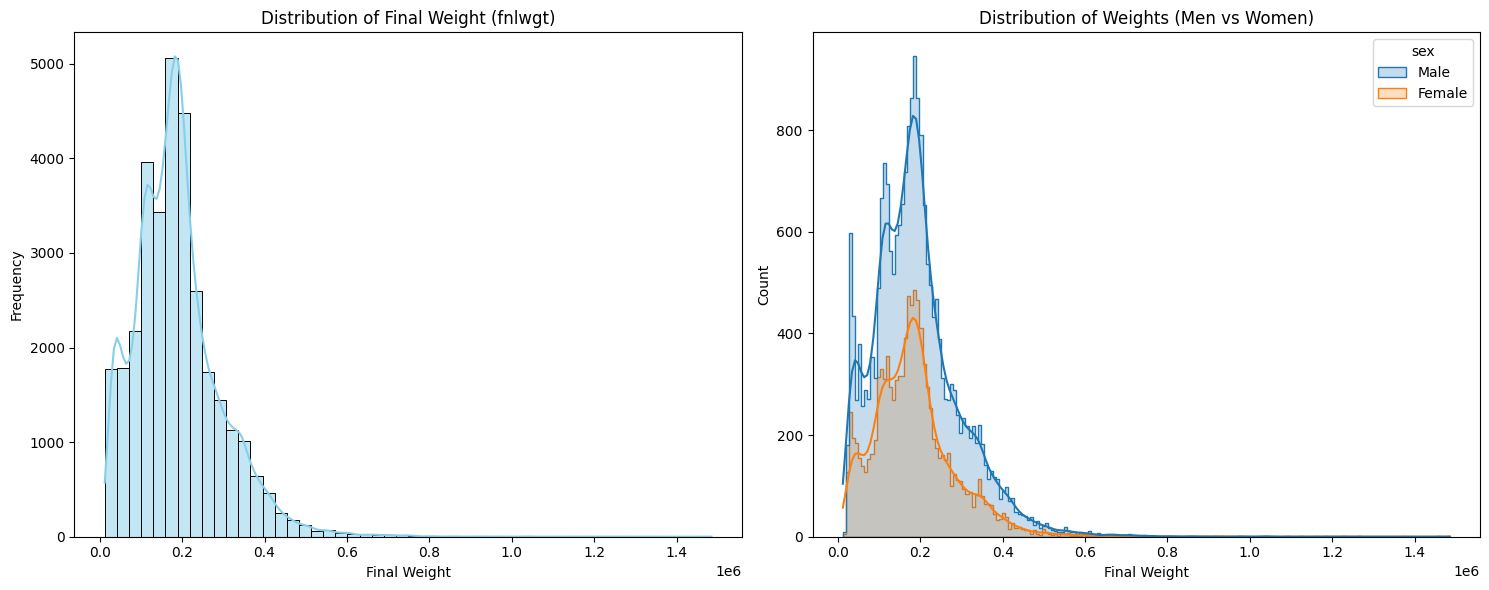

In [8]:
#Sampling weights plotting and checking for symetry
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram (To check Symmetry)
sns.histplot(data=df, x='fnlwgt', bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Final Weight (fnlwgt)')
axes[0].set_xlabel('Final Weight')
axes[0].set_ylabel('Frequency')

# Bata by gender
sns.histplot(data=df, x='fnlwgt', hue='sex', kde=True, element="step", common_norm=False)

plt.title('Distribution of Weights (Men vs Women)')
plt.xlabel('Final Weight')


plt.tight_layout()
plt.show()

In [9]:
# setting outliers to NaN with the help of the IQR

Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# HIGH outliers are the long tail
upper_limit = Q3 + 1.5 * IQR

print(f"Upper Limit for Outliers: {upper_limit:,.0f}")

# Anyone with a weight higher than the limit is an outlier
outliers_mask = df['fnlwgt'] > upper_limit

print(f"Number of outliers found: {outliers_mask.sum()}")

# Set the outliers to Missing (NaN)
df.loc[outliers_mask, 'fnlwgt'] = np.nan

# Verify
print(f"New Max Value: {df['fnlwgt'].max():,.0f}")

Upper Limit for Outliers: 415,887
Number of outliers found: 992
New Max Value: 415,847


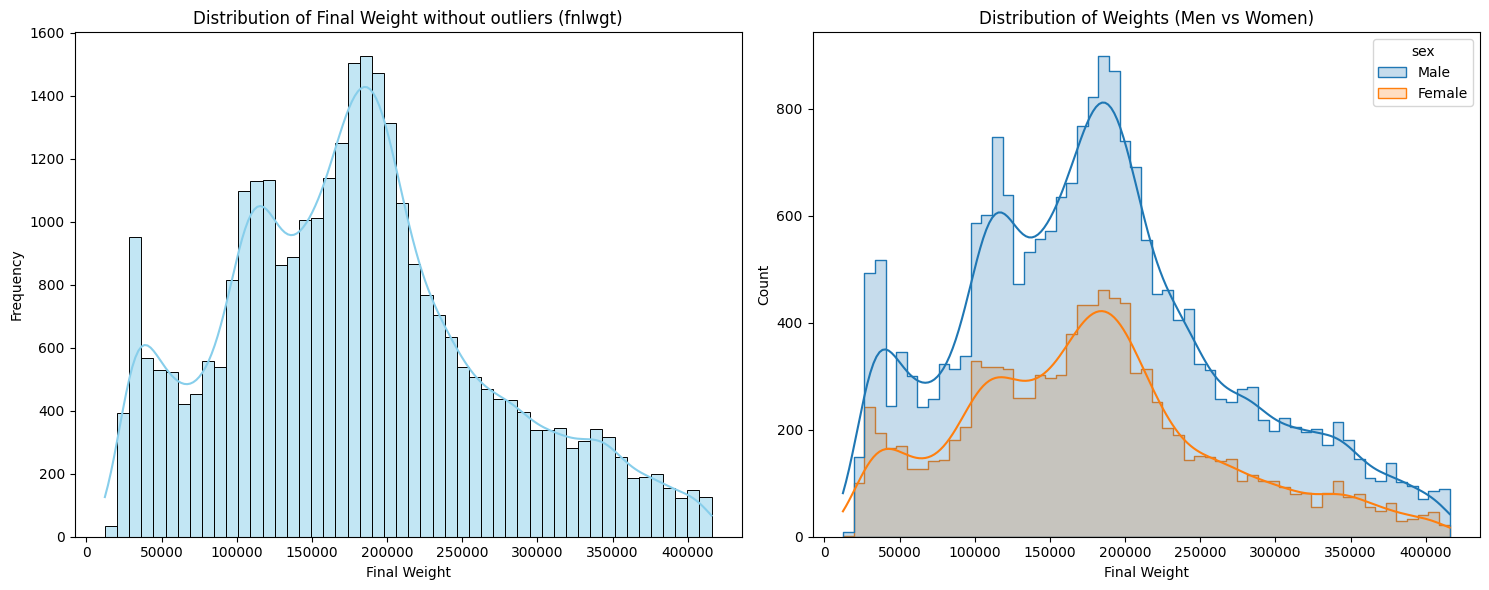

In [10]:
#redrawing after removing outliers, since NaNs are ignored
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram (To check Symmetry)
sns.histplot(data=df, x='fnlwgt', bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Final Weight without outliers (fnlwgt)')
axes[0].set_xlabel('Final Weight')
axes[0].set_ylabel('Frequency')

# data by gender
sns.histplot(data=df, x='fnlwgt', hue='sex', kde=True, element="step", common_norm=False)

plt.title('Distribution of Weights (Men vs Women)')
plt.xlabel('Final Weight')


plt.tight_layout()
plt.show()

In [11]:
# Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.
from sklearn.linear_model import LinearRegression
# Encoding 'sex' (Female = 0, Male = 1), I created a new column so that the original text is overwritten
df['sex_encoded'] = df['sex'].map({'Female': 0, 'Male': 1})

X = df[['sex_encoded']]
y = df['hours_per_week']

# Initialize and Fit the Model
reg = LinearRegression()
reg.fit(X, y)

# see the results
intercept = reg.intercept_
slope = reg.coef_[0]
r_squared = reg.score(X, y)

print(f"Average hours for Women (Intercept): {intercept:.2f}")
print(f"Difference for Men (slope): {slope:.2f}")
print(f"Impact of Gender on WH (R-squared): {r_squared:.4f}")

Average hours for Women (Intercept): 36.41
Difference for Men (slope): 6.02
Impact of Gender on WH (R-squared): 0.0526


In [13]:
# before i run mutlple regression, will use Autoviz to find the intersting ones (feature selection)
#!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
sep = ','


dft = AV.AutoViz("", sep, depVar="hours_per_week", dfte=df,
           header=0, verbose=1,
            lowess=False,chart_format='bokeh',max_rows_analyzed=32561,max_cols_analyzed=30)

Shape of your Data Set loaded: (32561, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 32561 exceeds maximum, randomly sampling 32561 rows for EDA...


Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options={'fnlwgt': np.str_('fnlwgt...}, value=np.str_('fnlwgt'))

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=[np.str_('workclass'), ...], value=np.str_('workclass'))

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options={'fnlwgt': np.str_('fnlwgt...}, value=np.str_('fnlwgt'))

HoloViews(Distribution, height=400, sizing_mode='fixed', width=600)

HoloViews(Violin, height=300, sizing_mode='fixed', width=700)

No date vars could be found in data set


HoloViews(Overlay, height=500, sizing_mode='fixed', width=600)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['workclass', ...], value='workclass')
        [1] Select(name='Y-Axis', options=['fnlwgt', 'hours_per_week...], value='fnlwgt')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Time to run AutoViz (in seconds) = 12


In [15]:
# rechecking native country to see iff any missing values:
print(f"Column: native_country")
print(df["native_country"].unique()) # distinct values
print("-" * 30)


Column: native_country
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
------------------------------


Now that we ran autoviz, will compare 3 models:

* Model A: hours_per_week --> sex (we already did, will re-run to see results next to each other)
* Model B: hours_per_week --> sex + education_num
*  Model C: hours_per_week --> sex + education_num + income_encoded

In [16]:
# Prepare data (creating income_encoded for sklearn)
df['income_encoded'] = df['income'].map({'<=50K': 0, '>50K': 1})
#Define the 3 sets of features
y = df['hours_per_week']
X1 = df[['sex_encoded']]
X2 = df[['sex_encoded', 'education_num']]
X3 = df[['sex_encoded', 'education_num', 'income_encoded']]
#Create a function to get the Adjusted R-Squared
def get_adj_r2(X, y):
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    # Number of people
    n = X.shape[0]
    # Number of features
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1), model.coef_

# see results
adj_r2_1, coef1 = get_adj_r2(X1, y)
adj_r2_2, coef2 = get_adj_r2(X2, y)
adj_r2_3, coef3 = get_adj_r2(X3, y)


print(f"ModelA (Sex Only) -> Adj R2: {adj_r2_1:.4f}, Sex Coef: {coef1[0]:.2f}")
print(f"ModelB (Sex + Edu) -> Adj R2: {adj_r2_2:.4f}, Sex Coef: {coef2[0]:.2f}")
print(f"ModelC (Sex + Edu + Inc) -> Adj R2: {adj_r2_3:.4f}, Sex Coef: {coef3[0]:.2f}")

ModelA (Sex Only) -> Adj R2: 0.0526, Sex Coef: 6.02
ModelB (Sex + Edu) -> Adj R2: 0.0736, Sex Coef: 5.97
ModelC (Sex + Edu + Inc) -> Adj R2: 0.0942, Sex Coef: 5.10


only 10% of the behavior is explained, will run an additional layer

In [18]:
# Add Age and any other numeric columns, had to redo the def since it kept returning errors
X4 = df[['sex_encoded', 'education_num', 'income_encoded', 'age']]
y = df['hours_per_week']

reg4 = LinearRegression().fit(X4, y)

def calculate_adj_r2(X, y, model):
    r2 = model.score(X, y)
    n, p = X.shape
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

result_adj_r2_4 = calculate_adj_r2(X4, y, reg4)

print(f"Model 4 (All Numeric) Adj R2: {result_adj_r2_4:.4f}")


Model 4 (All Numeric) Adj R2: 0.0944


Age didnt chnage the result, we need to shift the angle. I will check if relationship status or nationality could impact the result

In [19]:
# to run sklearm, will One-Hot Encode relationship and native_country, had to redo the function it kept returning errors
df_encoded = pd.get_dummies(df, columns=['relationship', 'native_country'], drop_first=True)

# I include our previous winners + the new encoded columns
X5 = df_encoded.filter(regex='relationship_|sex_encoded|education_num|income_encoded')
X6 = df_encoded.filter(regex='relationship_|native_country_|sex_encoded|education_num|income_encoded')
y = df_encoded['hours_per_week']

# Fit the model
reg5 = LinearRegression().fit(X5, y)

# Calculate Adjusted R-Squared and fit
def get_results(X, y, label):
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    n, p = X.shape
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f"{label} -> Adj R2: {adj_r2:.4f}")
    return adj_r2

adj5 = get_results(X5, y, "Model E (Adding Relationship)")
adj6 = get_results(X6, y, "Model F (Adding Nationality)")

Model E (Adding Relationship) -> Adj R2: 0.1341
Model F (Adding Nationality) -> Adj R2: 0.1351


To determine the best model, I used Adjusted R-squared as the decision metric. Model F is technically the 'best' with an Adjusted $R^2$ of 0.1351. but the biggest contributors in the gender gap was relationship

In [20]:
# to confirm our results in numbers how is relationship in genders affecting hours
analysis = df.groupby(['sex', 'relationship'])['hours_per_week'].mean().unstack()
print(analysis)



relationship   Husband   Not-in-family  Other-relative  Own-child  Unmarried  \
sex                                                                            
Female        40.000000    38.366968       35.093023    30.806682  38.249435   
Male          44.120452    42.545147       38.499093    35.227772  41.963384   

relationship    Wife     
sex                      
Female        36.844828  
Male          50.000000  


In [21]:
# to read the above properly i will count the mislabeled wives and husbands
counts = pd.crosstab(df['sex'], df['relationship'])
print(counts)
# this way we can skip them and compare male husband to female wives and confirm the model

relationship  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
sex                                                                          
Female             1       3875             430         2245       2654      
Male           13192       4430             551         2823        792      

relationship  Wife  
sex                 
Female        1566  
Male             2  



we can see we have only one 1 female - husband and 2 male-wife. we can safely disregard when interpreting the results:

* Male Husbands ($n=13,192$) work the most at 44.12 hours, while Female Wives ($n=1,566$) work significantly less at 36.84 hours. This 7.28-hour gap is the largest in the dataset
* Individuals with the relationship status "Own-child" work the fewest hours (Female: 30.8 | Male: 35.2), likely reflecting a combination of younger age and childcare balance
* For those "Not-in-family" (Single), the gender gap narrows to 4.18 hours (Male: 42.54 vs. Female: 38.36).






**Correlation:**


Find the correlations between age, education_num, and hours_per_week.

1.   Do any of the variables appear to be correlated? How did you make your assessment?
2.   Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?


3.   How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?
4.   Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?
**

In [22]:
#run the correlation matrix

correlations = df[['age', 'education_num', 'hours_per_week']].corr()
print(correlations)

                   age    education_num  hours_per_week
age             1.000000    0.036527        0.068756   
education_num   0.036527    1.000000        0.148123   
hours_per_week  0.068756    0.148123        1.000000   


**looking at the r. the only small correlation that can be reported is education_um of 0.1481**

In [23]:
#test any variable pairs with a correlation coefficient > |0.1|

from scipy.stats import pearsonr
corr, p_val = pearsonr(df['education_num'], df['hours_per_week'])
print(f"Correlation: {corr:.4f}, P-value: {p_val:.4e}")

Correlation: 0.1481, P-value: 4.2366e-159


**P-value is way smaller than alpha = 0.05, we reject the null hypothesis and this means that there is a real relationship between educations and working hous**

In [24]:
#Age vs education in Gendr groups (female, male)
male_corr = df[df['sex_encoded'] == 1][['age', 'education_num']].corr().iloc[0,1]
female_corr = df[df['sex_encoded'] == 0][['age', 'education_num']].corr().iloc[0,1]

print(f"Male Age-Edu Correlation: {male_corr:.4f}")
print(f"Female Age-Edu Correlation: {female_corr:.4f}")

Male Age-Edu Correlation: 0.0605
Female Age-Edu Correlation: -0.0179


**The relationship between age and education differs slightly by gender, but in both cases the correlation is weak and likely not practically significant.**


In [25]:
#computing the covariance matrix
print(df[['education_num', 'hours_per_week']].cov())

                education_num  hours_per_week
education_num     6.618890         4.705338  
hours_per_week    4.705338       152.458995  


The covariance between education_num and hours_per_week is positive (4.71), indicating that higher education levels are associated with working more hours. However, the correlation coefficient (0.148) provides a clearer interpretation and shows that this relationship is positive but relatively weak.